<a href="https://colab.research.google.com/github/Prashantthhh/GenerativeAI_B39/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

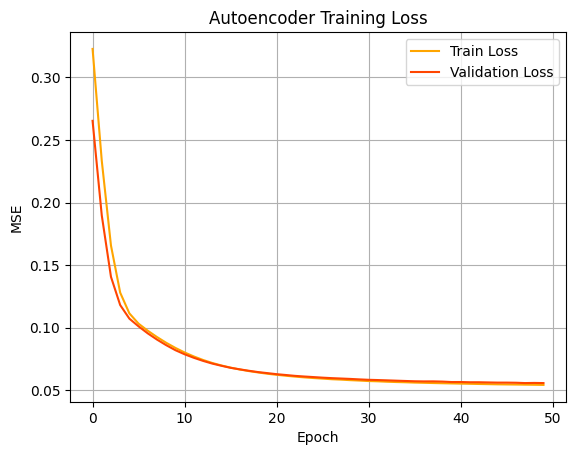

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Random Forest Performance (on encoded data):
MAE: 0.26
RMSE: 0.31
R² Score: -0.09


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# === 0. Prepare some dummy data ===
X = np.random.rand(1000, 20)  # 1000 samples, 20 features
y = np.random.rand(1000)

# === 1. Split data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 2. Build Autoencoder ===
input_dim = X_train.shape[1]
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# === 3. Train Autoencoder ===
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=0)

# === 4. Plot training loss ===
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orangered')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Autoencoder Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# === 5. Transform features ===
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# === 6. Train Random Forest ===
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_encoded, y_train)

# === 7. Predict and evaluate ===
y_pred = rf.predict(X_test_encoded)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Performance (on encoded data):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
